<a href="https://colab.research.google.com/github/juanpablosalas/SalasJuanPablo_CV_Entrega2/blob/main/SalasJuanPablo_CV_Entrega2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Carga de datos
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cars93.csv')
data.keys()

Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [ ]:
# Algunas características de los carros y el objetivo
keys = ['Manufacturer', 'Model', 'Type', 'MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers', 'Weight', 'Origin']
y = 'Price'

In [ ]:
manufacturers = data['Manufacturer'].unique()
data['Manufacturer'] = data['Manufacturer'].astype('category').cat.codes

models = data['Model'].unique()
data['Model'] = data['Model'].astype('category').cat.codes

origin = data['Origin'].unique()
data['Origin'] = data['Origin'].astype('category').cat.codes

tipo = data['Type'].unique()
data['Type'] = data['Type'].astype('category').cat.codes

data['EngineSize'] = data['EngineSize'].astype('int')
data['Price'] = data['Price'].astype('int')
data['Fuel.tank.capacity'] = data['Fuel.tank.capacity'].astype('int')

In [ ]:
#Cabecera de los datos
data[keys].head(10)

,Manufacturer,Model,Type,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Weight,Origin
0,0,48,3,25,31,1,140,6300,2890,13,5,2705,1
1,0,55,2,18,25,3,200,5500,2335,18,5,3560,1
2,1,8,0,20,26,2,172,5500,2280,16,5,3375,1
3,1,0,2,19,26,2,172,5500,2535,21,6,3405,1
4,2,5,2,22,30,3,208,5700,2545,21,4,3640,1
5,3,23,2,22,31,2,110,5200,2565,16,6,2880,0
6,3,53,1,19,28,3,170,4800,1570,18,6,3470,0
7,3,73,1,16,25,5,180,4000,1320,23,6,4105,0
8,3,72,2,19,27,3,170,4800,1690,18,5,3495,0
9,4,34,1,16,25,4,200,4100,1510,18,6,3620,0


###Visualización de algunos datos

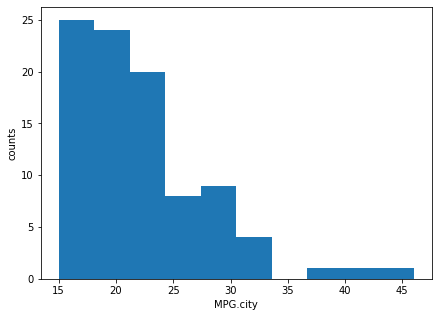

In [ ]:
# Millas por galón en la ciudad
fig = plt.figure(figsize=(7,5))
plt.hist(data['MPG.city'])
plt.xlabel('MPG.city')
plt.ylabel('counts')
plt.show()

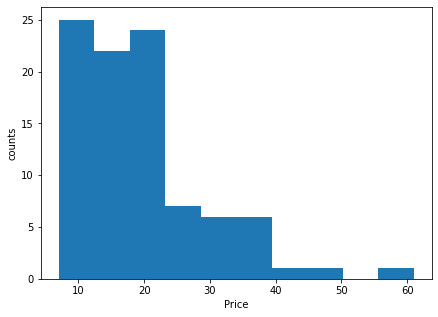

In [ ]:
# Precio
fig = plt.figure(figsize=(7,5))
plt.hist(data['Price'])
plt.xlabel('Price')
plt.ylabel('counts')
plt.show()

###Clasificación visual

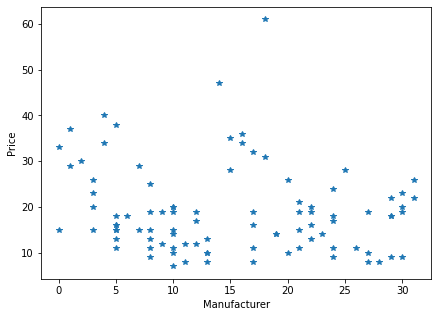

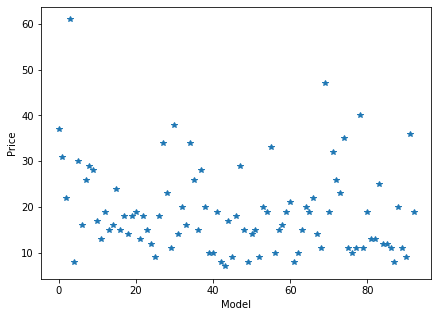

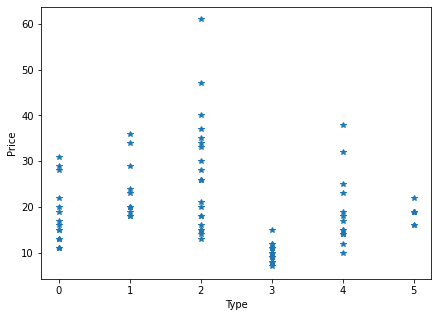

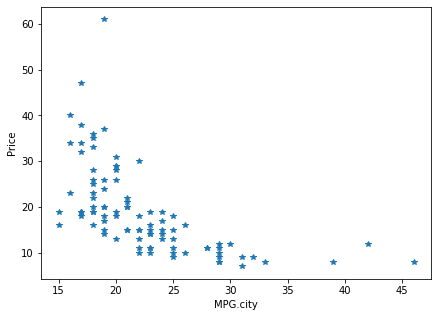

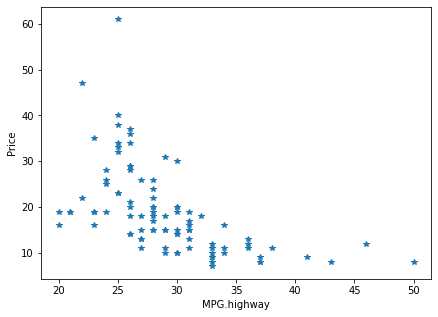

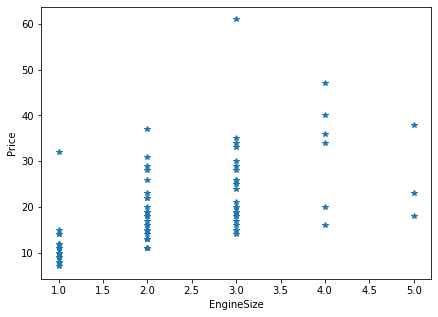

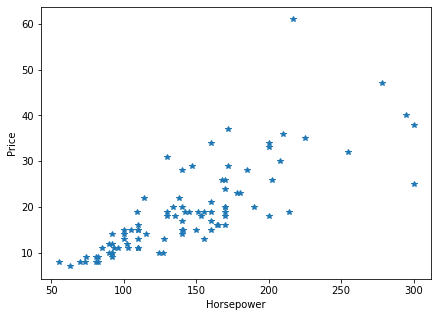

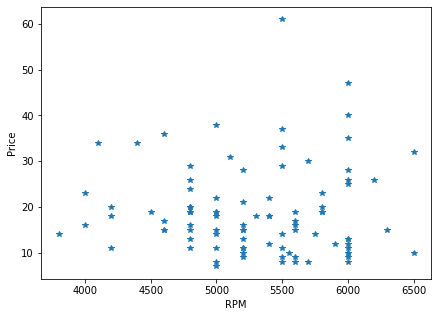

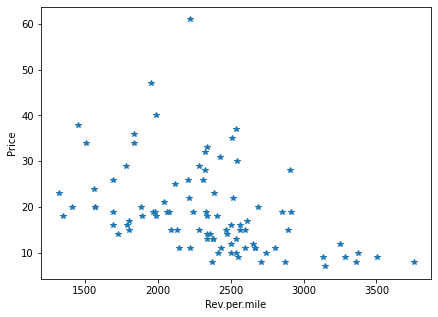

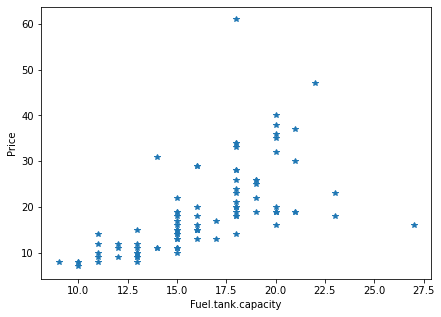

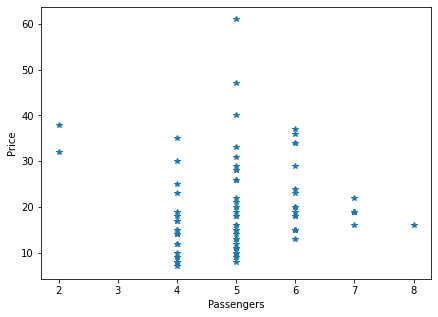

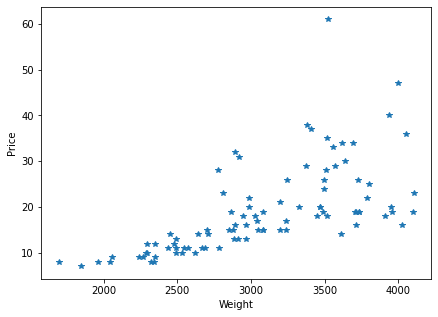

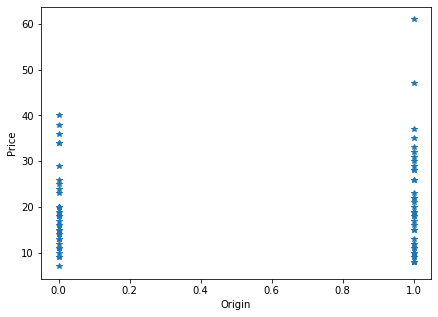

In [ ]:
for k in keys:
  fig = plt.figure(figsize=(7,5))
  plt.plot(data[k],data[y],'*')
  plt.xlabel(k)
  plt.ylabel(y)
  plt.show()

In [ ]:
mitad = (data['Price'].max()-data['Price'].min())/2
Y = np.array(data[y], dtype=int)
np.unique(Y,return_counts=True)

Y[Y<mitad] = 0
Y[Y>=mitad] = 1

np.unique(Y,return_counts=True)

(array([0, 1]), array([76, 17]))

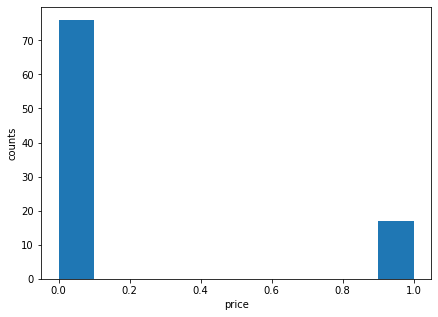

In [ ]:
fig = plt.figure(figsize=(7,5))
plt.hist(Y)
plt.ylabel('counts')
plt.xlabel('price')
plt.show()

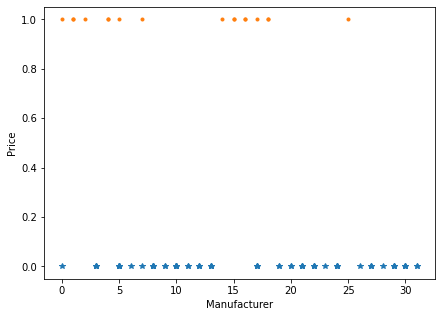

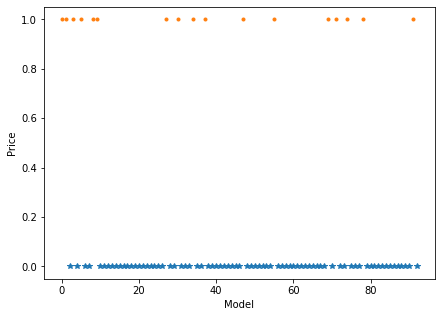

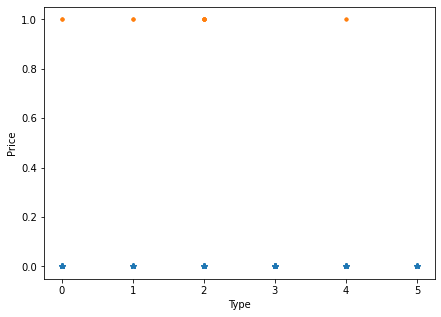

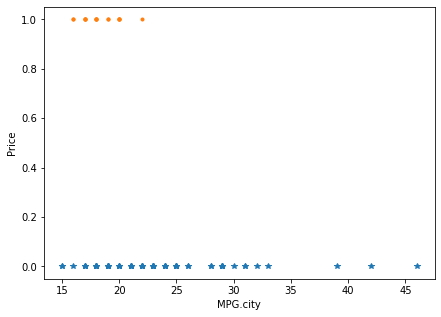

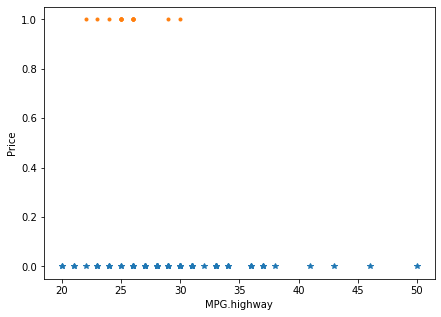

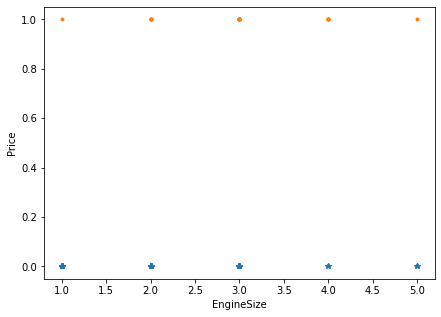

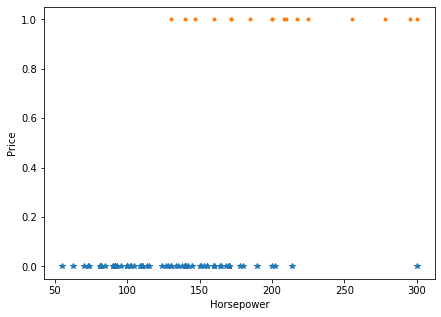

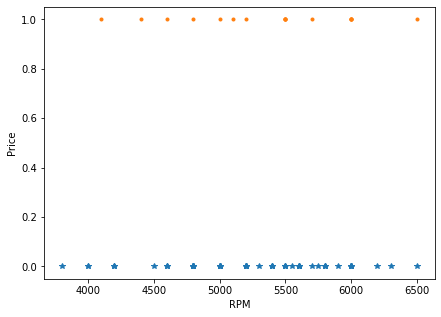

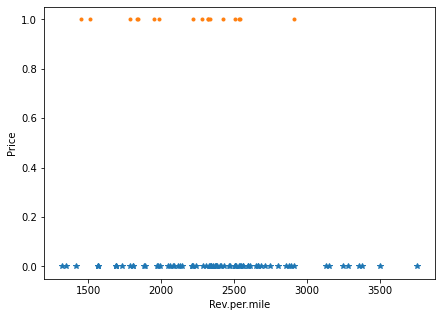

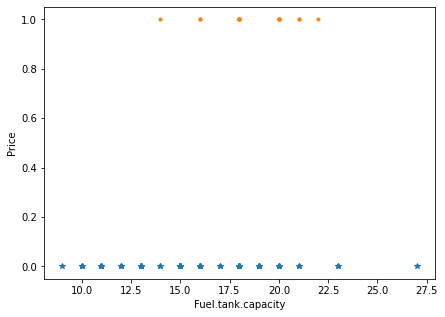

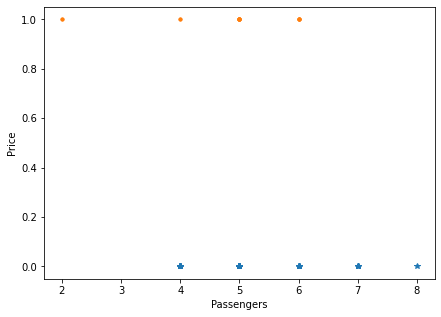

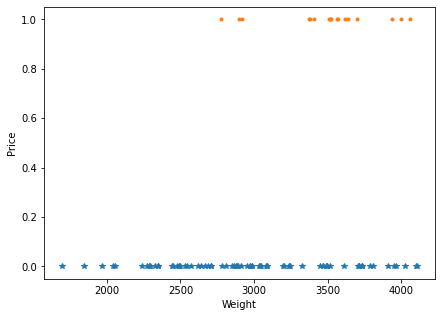

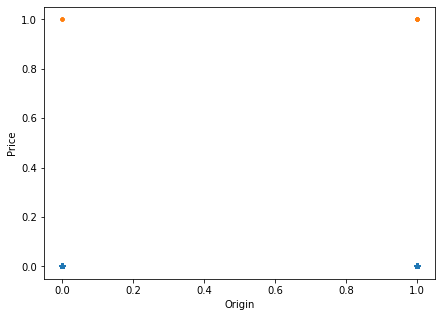

In [ ]:
for k in keys:
  fig = plt.figure(figsize=(7,5))
  plt.plot(data[k][Y==0],Y[Y==0],'*')
  plt.plot(data[k][Y==1],Y[Y==1],'.')
  plt.xlabel(k)
  plt.ylabel(y)
  plt.show()

### Correlaciones

In [ ]:
! pip install corner

In [ ]:
import corner

In [ ]:
from sklearn.preprocessing import StandardScaler

data_scaled = StandardScaler().fit_transform(data[keys])

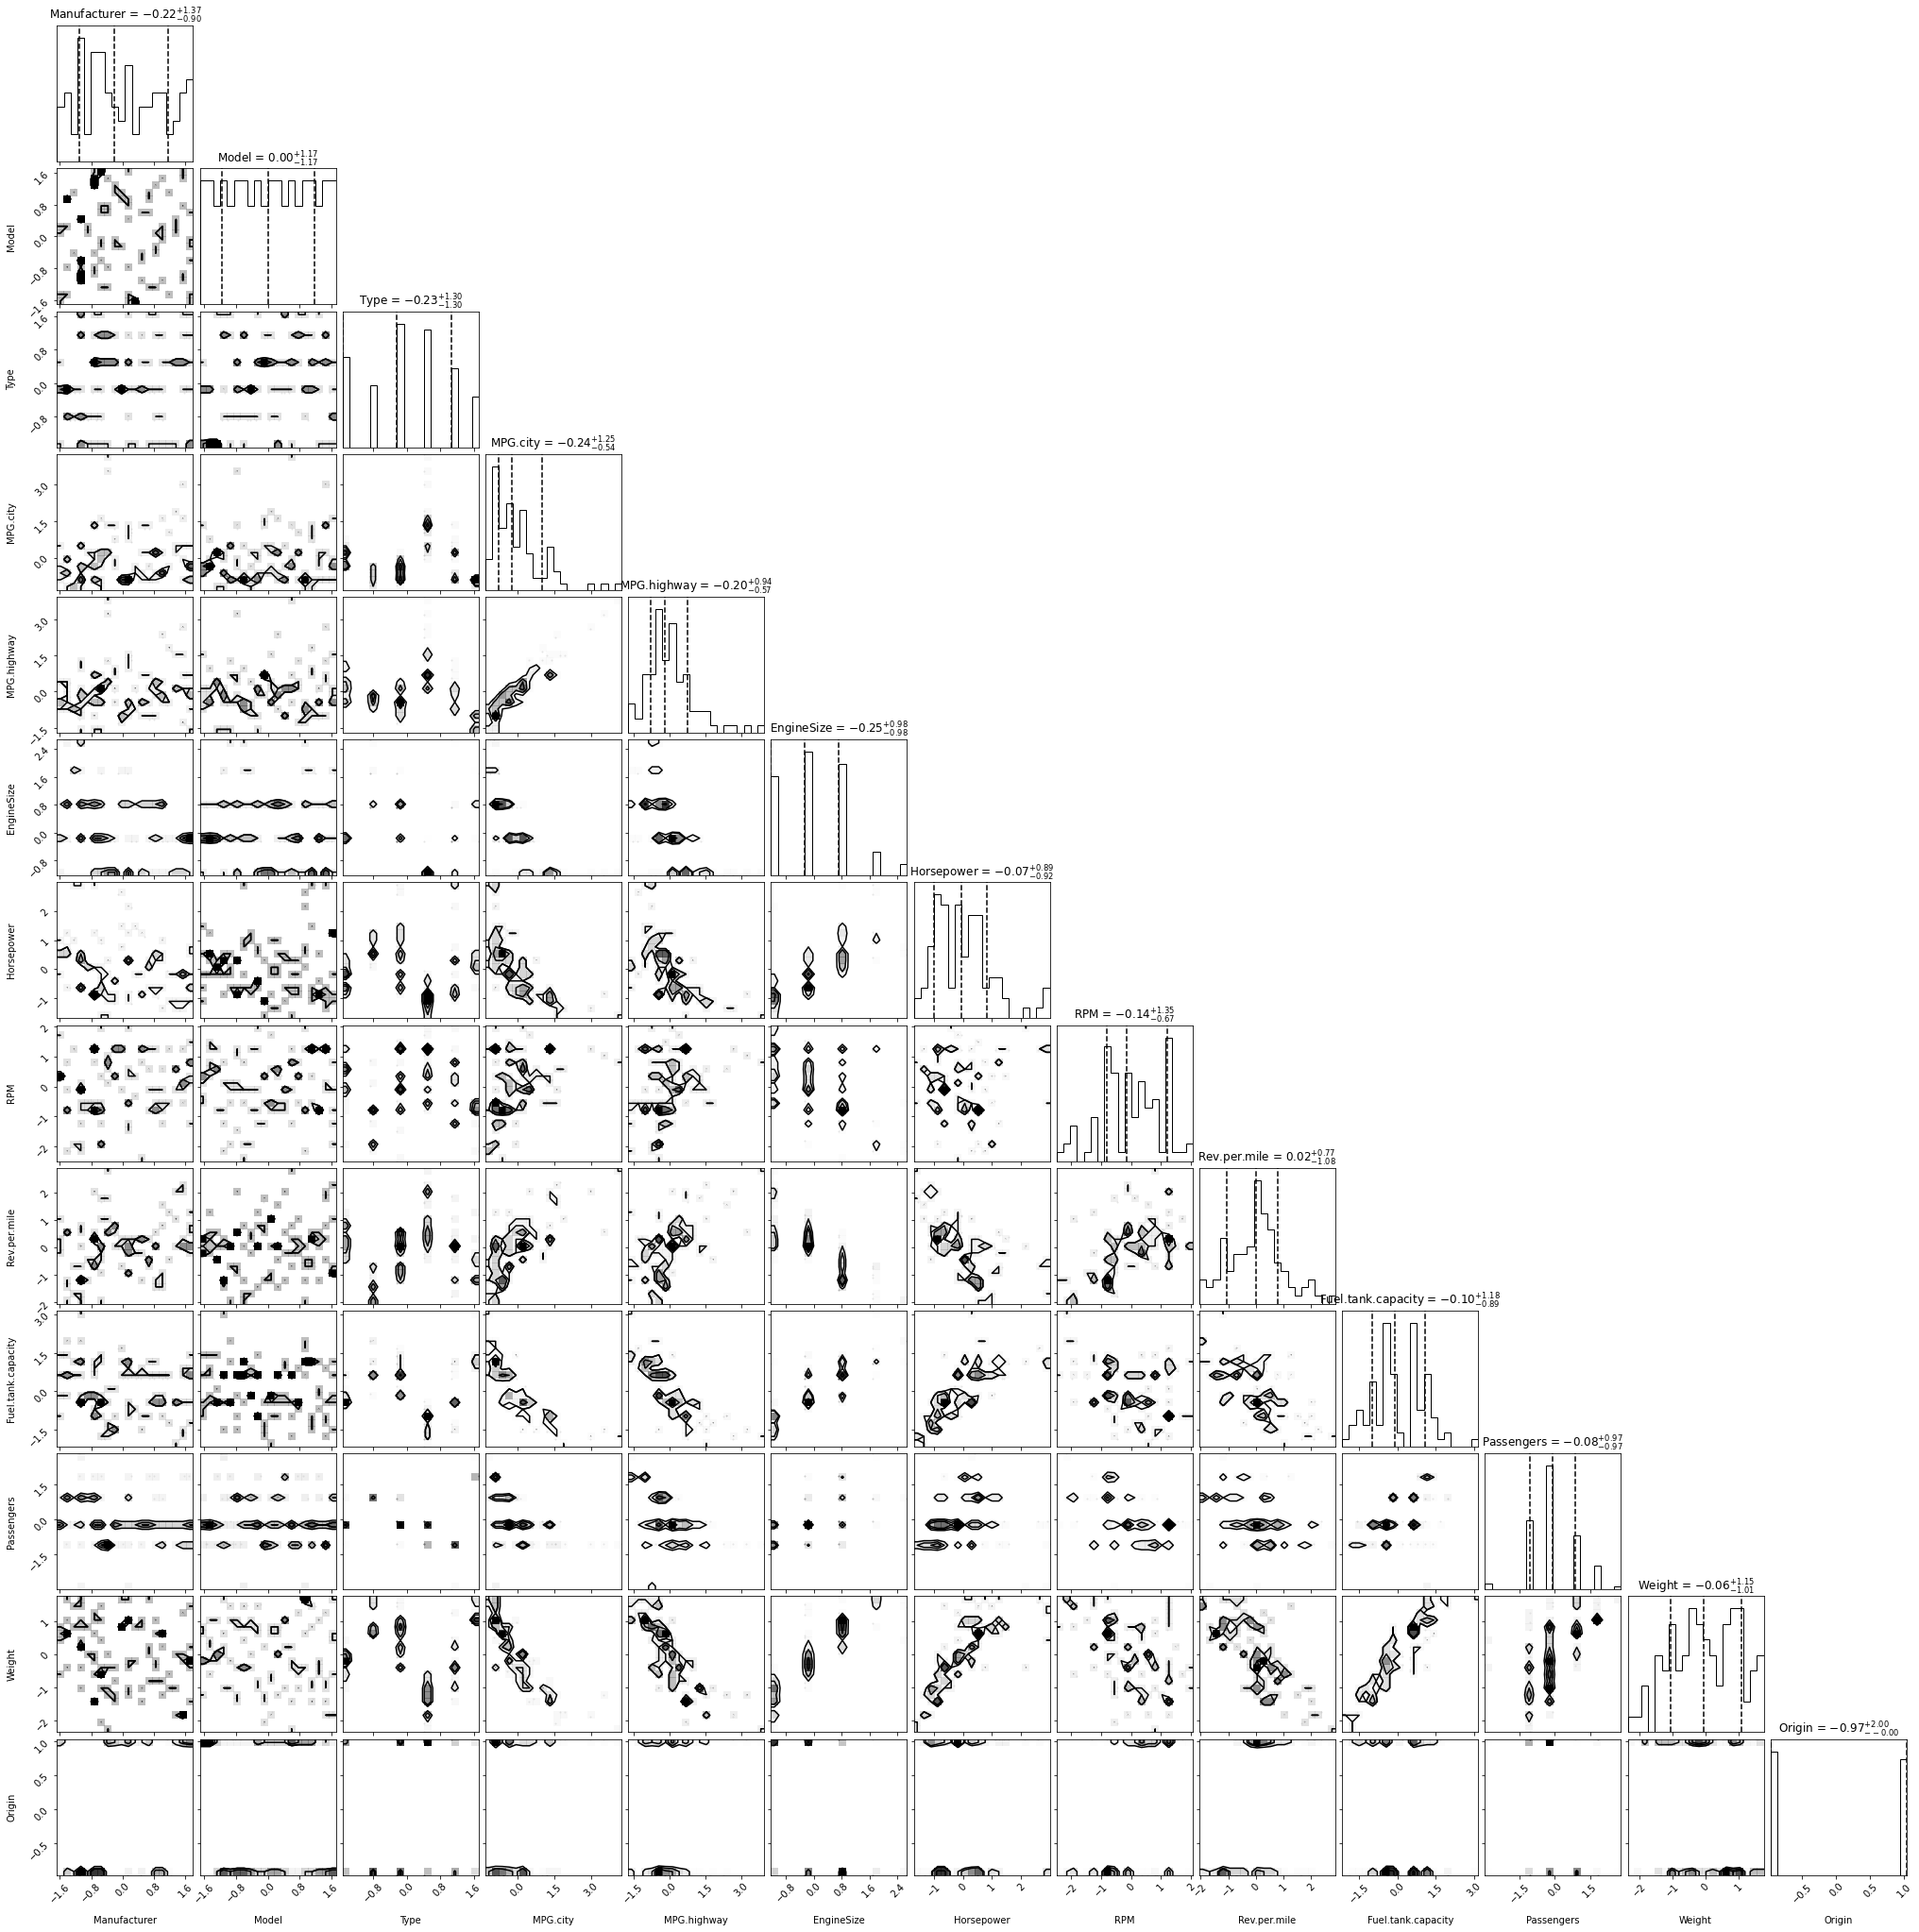

In [ ]:
figure = corner.corner(data_scaled, labels=keys, quantiles=[0.16, 0.5, 0.84], show_titles=True, title_kwargs={"fontsize": 12})

### Machine Learning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

model = RandomForestClassifier(n_estimators=100, max_depth=10)
X_train, X_test, Y_train, Y_test = train_test_split(np.array(data[keys]),Y)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [ ]:
# Precisión del algoritmo
precis = sum(Y_pred == Y_test)/len(Y_test)
precis

0.875

In [ ]:
# Importancias de variables para precios
importances = model.feature_importances_
importances

array([0.12761568, 0.09195194, 0.05649401, 0.05031394, 0.10041578,
       0.02506739, 0.2157402 , 0.05211003, 0.06362692, 0.04018627,
       0.05597886, 0.11114825, 0.00935073])

In [ ]:
# Dos variables más importantes para precio de un carro
ii = np.argsort(importances)[::-1]
print("Las dos variables más importantes son {} y {}".format(*np.array(keys)[ii][0:2]))

Las dos variables más importantes son Horsepower y Manufacturer
